# Get a glimpse at the data

## Import the reference image
First, we load and display the reference image. We'll use matplotlib for plotting and the cv2 library to load the image. The folder with the files generated from the reference image mapper enrichment should be located in the same directory from which you are also executing this code.

In the example from our blog post, we use the Reference Image Mapper Enrichment 'multiple_paintings_standing'. Make sure you download the same enrichment if you want to follow the blog post.

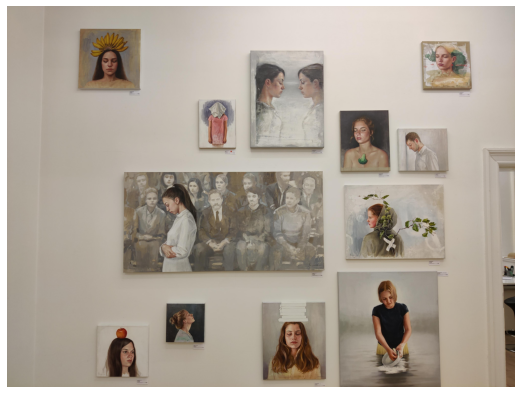

In [5]:
import cv2
import matplotlib.pyplot as plt
# larger labels are nicer to read
plt.rcParams.update({'font.size': 18})

# ACTION NEEDED: define the path on your own PC
path_to_reference_image_mapper = "./Viewing_Paintings_REFERENCE-IMAGE-MAPPER_multiple_paintings_standing_csv"

image_fig, image_axs = plt.subplots(1,1, figsize = (10,7))
reference_image = cv2.imread(f"{path_to_reference_image_mapper}/reference_image.jpeg")

# convert color format to RGB
reference_image = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)

# remove numbers on axis
image_axs.set_axis_off()
image_axs.imshow(reference_image);

## Import the fixation data
To show fixations on top of the image, we need to import the corresponding datafile from the reference image mapper folder. 

The data is stored as a csv table, and we use pandas to load the file as a dataframe.

In [2]:
import pandas as pd

fixations = pd.read_csv(f"{path_to_reference_image_mapper}/fixations.csv")
fixations.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected in reference image,fixation x [px],fixation y [px]
0,055f4166-0c12-4752-b1a6-32c94b1c56b2,54a0dfa4-23dd-48f4-806e-6fdb519d6a7c,248,1636035560036503914,1636035560228482914,191,True,2410.0,2134.0
1,055f4166-0c12-4752-b1a6-32c94b1c56b2,54a0dfa4-23dd-48f4-806e-6fdb519d6a7c,249,1636035560256651914,1636035560476503914,219,True,2224.0,1717.0
2,055f4166-0c12-4752-b1a6-32c94b1c56b2,54a0dfa4-23dd-48f4-806e-6fdb519d6a7c,250,1636035560500491914,1636035560728557914,228,True,2431.0,1560.0
3,055f4166-0c12-4752-b1a6-32c94b1c56b2,54a0dfa4-23dd-48f4-806e-6fdb519d6a7c,251,1636035560776494914,1636035560968578914,192,True,1936.0,1118.0
4,055f4166-0c12-4752-b1a6-32c94b1c56b2,54a0dfa4-23dd-48f4-806e-6fdb519d6a7c,252,1636035561008557914,1636035561148511914,139,True,2826.0,1668.0


Now we can see which data the fixation file contains: besides the section and recording id, which are specific to individual subjects and enrichment sections, we get:
- **fixation id**: an ID for each fixation, 
- **start timestamp [ns]**: the time when this fixation started  
- **end timestamp [ns]**: the time when this fixation ended
- **duration [ms]**: the duration of the fixation 
- **fixation detected in reference image**: if the fixation was inside the reference image
- **fixation x [px]**: x-coordinate of the fixation relative to the reference image 
- **fixation y [px]**: y coordinate of the fixation relative to the reference image


## Plot the fixation data and the reference image
In the next step, we can visualise these information by overlaying the fixation position on the reference image:

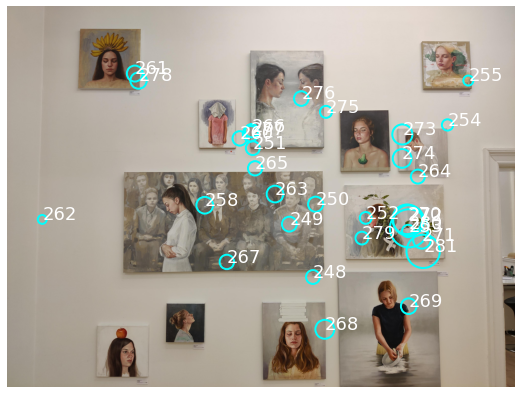

In [4]:
# we choose one section as an example, to avoid cluttering from more than one participant
import numpy as np
example_section = np.unique(fixations['section id'])[0]

example_fixations = fixations[fixations['section id'] == example_section]

fixation_fig, fixation_axs = plt.subplots(1,1, figsize = (10,7))
# show the reference image as above
fixation_axs.imshow(np.asarray(reference_image))
# plot fixations at their x- and y-position
fixation_axs.scatter(example_fixations['fixation x [px]'],
                     example_fixations['fixation y [px]'],
                     # change the face- and edgecolor to get circles rather than dots
                     facecolor='none', edgecolor='cyan', linewidth=2, 
                     # set the size of the circles relative to the duration of each fixation
                     s = example_fixations['duration [ms]']);
# enumerate the fixations
for fix_id, x, y in zip(example_fixations['fixation id'],
                        example_fixations['fixation x [px]'], 
                        example_fixations['fixation y [px]']
                       ):
        fixation_axs.annotate(fix_id, [x, y], color = 'white');
# optionally, add lines connecting the fixations in the order they happened
# fixation_axs.plot(example_fixations['fixation x [px]'], 
#                   example_fixations['fixation y [px]'], 
#                   color = 'grey')

        
fixation_axs.set_axis_off()
fixation_fig.savefig('./figures/fixations_on_single_RI.png');